<a href="https://colab.research.google.com/github/yghtnkks/Gravitational-Wave-Event-Spin-Distribution-Generator/blob/main/GWAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pesummary
from pesummary.io import read
import h5py
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
import os

# get the current working directory
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)

/home/ygthnkks/Desktop


In [ ]:
import pandas
import numpy
gwdata= "../Desktop/GWData.csv"   ####Change that to your directory + file name
readdata=pandas.read_csv(gwdata)
readdata

,id,commonName,version,catalog.shortName,GPS,reference,jsonurl,mass_1_source,mass_1_source_lower,mass_1_source_upper,...,redshift_upper,far,far_lower,far_upper,p_astro,p_astro_lower,p_astro_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper
0,GW150914-v3,GW150914,3,GWTC-1-confident,1.126259e+09,https://doi.org/10.7935/82H3-HH23,http://gwosc.org/eventapi/json/GWTC-1-confiden...,35.6,-3.1,4.7,...,0.03,1.000000e-07,NaN,NaN,1.00000,NaN,NaN,63.1,-3.0,3.4
1,GW151012-v3,GW151012,3,GWTC-1-confident,1.128679e+09,https://doi.org/10.7935/82H3-HH23,http://gwosc.org/eventapi/json/GWTC-1-confiden...,23.2,-5.5,14.9,...,0.09,7.920000e-03,NaN,NaN,1.00000,NaN,NaN,35.6,-3.8,10.8
2,GW151226-v2,GW151226,2,GWTC-1-confident,1.135136e+09,https://doi.org/10.7935/82H3-HH23,http://gwosc.org/eventapi/json/GWTC-1-confiden...,13.7,-3.2,8.8,...,0.04,1.000000e-07,NaN,NaN,1.00000,NaN,NaN,20.5,-1.5,6.4
3,GW170104-v2,GW170104,2,GWTC-1-confident,1.167560e+09,https://doi.org/10.7935/82H3-HH23,http://gwosc.org/eventapi/json/GWTC-1-confiden...,30.8,-5.6,7.3,...,0.08,1.000000e-07,NaN,NaN,1.00000,NaN,NaN,48.9,-4.0,5.1
4,GW170608-v3,GW170608,3,GWTC-1-confident,1.180922e+09,https://doi.org/10.7935/82H3-HH23,http://gwosc.org/eventapi/json/GWTC-1-confiden...,11.0,-1.7,5.5,...,0.02,1.000000e-07,NaN,NaN,1.00000,NaN,NaN,17.8,-0.7,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,GW200306_093714-v1,GW200306_093714,1,GWTC-3-confident,1.267523e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,28.3,-7.7,17.1,...,0.24,2.400000e+01,NaN,NaN,0.81156,NaN,NaN,41.7,-6.9,12.3
89,GW200308_173609-v1,GW200308_173609,1,GWTC-3-confident,1.267724e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,60.0,-29.0,166.0,...,1.47,2.400000e+00,NaN,NaN,0.85660,NaN,NaN,88.0,-47.0,169.0
90,GW200311_115853-v1,GW200311_115853,1,GWTC-3-confident,1.267963e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,34.2,-3.8,6.4,...,0.05,1.000000e-05,NaN,NaN,0.99000,NaN,NaN,59.0,-3.9,4.8
91,GW200316_215756-v1,GW200316_215756,1,GWTC-3-confident,1.268431e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,13.1,-2.9,10.2,...,0.08,1.000000e-05,NaN,NaN,0.99000,NaN,NaN,20.2,-1.9,7.4


In [ ]:
import pandas as pd

data = pd.read_csv("GWData.csv")
eventname = data['commonName'].tolist()
# converting column data to list
mass_1 = data['mass_1_source'].tolist()
mass_2 =data['mass_2_source'].tolist()
final_mass =data['final_mass_source'].tolist()
effsp = data['chi_eff'].tolist()
mass_1_unc_up =data['mass_1_source_upper'].tolist()
mass_1_unc_dw =data['mass_1_source_lower'].tolist()
mass_2_unc_up =data['mass_2_source_upper'].tolist()
mass_2_unc_dw =data['mass_2_source_lower'].tolist()
final_mass_unc_up =data['final_mass_source_upper'].tolist()
final_mass_unc_dw =data['final_mass_source_lower'].tolist()
effsp_unc_up =data['chi_eff_upper'].tolist()
effsp_unc_dw =data['chi_eff_lower'].tolist()
print(eventname)
print(len(eventname))
#When Mass >= 3 Solar Mass ,black hole


['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', 'GW170814', 'GW170817', 'GW170818', 'GW170823', 'GW190403_051519', 'GW190408_181802', 'GW190412', 'GW190413_052954', 'GW190413_134308', 'GW190421_213856', 'GW190424_180648', 'GW190425', 'GW190426_152155', 'GW190426_190642', 'GW190503_185404', 'GW190512_180714', 'GW190513_205428', 'GW190514_065416', 'GW190517_055101', 'GW190519_153544', 'GW190521', 'GW190521_074359', 'GW190527_092055', 'GW190602_175927', 'GW190620_030421', 'GW190630_185205', 'GW190701_203306', 'GW190706_222641', 'GW190707_093326', 'GW190708_232457', 'GW190719_215514', 'GW190720_000836', 'GW190725_174728', 'GW190727_060333', 'GW190728_064510', 'GW190731_140936', 'GW190803_022701', 'GW190805_211137', 'GW190814', 'GW190828_063405', 'GW190828_065509', 'GW190909_114149', 'GW190910_112807', 'GW190915_235702', 'GW190916_200658', 'GW190917_114630', 'GW190924_021846', 'GW190925_232845', 'GW190926_050336', 'GW190929_012149', 'GW190930_133541', 'G

In [ ]:
from gwosc.datasets import find_datasets
events = find_datasets(type='event', match="GW")
print("Some available events are:")
print(events)
eventslib = []
for x in events:
    if x[:-3] not in eventslib:
        modified = x[:-3]
        eventslib.append(modified)

print(eventslib)
print(len(eventslib))

modified_eventslib = []

for x in eventslib:
    if x in eventname:
        modified_eventslib.append(x)


length = len(modified_eventslib)
print (length)
print(modified_eventslib)


Some available events are:
['GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190403_051519-v1', 'GW190408_181802-v1', 'GW190408_181802-v2', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190412_053044-v4', 'GW190413_052954-v1', 'GW190413_052954-v2', 'GW190413_134308-v1', 'GW190413_134308-v2', 'GW190421_213856-v1', 'GW190421_213856-v2', 'GW190424_180648-v1', 'GW190424_180648-v2', 'GW190425-v1', 'GW190425-v2', 'GW190425_081805-v3', 'GW190426_152155-v1', 'GW190426_152155-v2', 'GW190426_190642-v1', 'GW190503_185404-v1', 'GW190503_185404-v2', 'GW190512_180714-v1', 'GW190512_180714-v2', 'GW190513_205428-v1', 'GW190513_205428-v2', 'GW190514_065416-v1', 'GW190514_065416-v2', 'GW190517_055101-v1', 'G

In [ ]:
#

In [ ]:
####This part of the code finds .h5 files of GW events to extract a1 and a2 values. Change the directories according to where you placed the .h5 files. Put all .h5 events into a single file.
import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
folder_name = "GWEvents"
folder_path = os.path.join(desktop_path, folder_name)
os.chdir(folder_path)
print("Current Working Directory:", os.getcwd())
file_names = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_names.append(file)
print(file_names)
print(len(file_names))

for x in file_names:
    if x[-3:] == 'csv':
        file_names.remove(x)
print(file_names)
print(len(file_names))
print(len(modified_eventslib))


available_data = dict(name =[], file = [])
def check_strings_in_list(y, z):
    for eventss in y:
        for i in z:
            if eventss in i:
                available_data['file'].append(i)
                available_data['name'].append(eventss)
    for x in range (len(available_data['file'])):
        print(available_data['name'][x] + ' ---' + available_data['file'][x])


check_strings_in_list(modified_eventslib, file_names)






Current Working Directory: /home/ygthnkks/Desktop/GWEvents
['IGWN-GWTC3p0-v1-GW200128_022011_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC3p0-v1-GW191105_143521_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC2p1-v2-GW151226_033853_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC2p1-v2-GW190929_012149_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC2p1-v2-GW190728_064510_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC3p0-v1-GW200220_061928_PEDataRelease_mixed_cosmo.h5', 'tmpitnltz3o_IGWN-GWTC2p1-v2-GW170104_101158_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC2p1-v2-GW190408_181802_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC3p0-v1-GW191127_050227_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC2p1-v2-GW190731_140936_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC2p1-v2-GW170818_022509_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC3p0-v1-GW200105_162426_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC3p0-v1-GW200308_173609_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC2p1-v2-GW190503_185404_PEDataRelease_mixed_cosmo.h5', 'IGWN-GWTC2p1-v2-GW190727_060333

In [ ]:
import h5py
import statistics
import numpy as np







In [ ]:
waveforms = []
a_1 =[]
a_2 = []

#f=h5py.File('IGWN-GWTC3p0-v1-GW200322_091133_PEDataRelease_mixed_cosmo.h5', 'r')
#list(f.keys())
#dset = f['C01:Mixed']
#list(dset)
#posterior = dset['posterior_samples']
#list(posterior['a_1'])
#maxL=np.argmax(posterior['log_likelihood'])
#best_a1 = posterior['a_1'][maxL]
#print (best_a1)

##This section of the code selects wavemodel used for analysis. This part of the code may be varied but not suggested.
waveforms = ['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'IMRPhenomXPHM', 'IMRPhenomPv2NRT_lowSpin_posterior']
Error1 = "Unable to synchronously open object (object 'C01:Mixed' doesn't exist)"
Error2 = "Unable to synchronously open object (object 'C01:IMRPhenomXPHM' doesn't exist)"
Error3 = "Field posterior_samples does not appear in this type."
for x in available_data['file']:
 def Spin_Fetching(filename):
    for files in filename:
        try:
            f=h5py.File(files, 'r')
            list(f.keys())
            for forms in waveforms:
                if forms in f.keys():
                    dset = f[forms]
                    list(dset)
                    if 'posterior_samples' in dset:
                        posterior = dset['posterior_samples']
                        list(posterior['a_1'])
                        maxL=np.argmax(posterior['log_likelihood'])
                        best_a1 = posterior['a_1'][maxL]
                        best_a2= posterior['a_2'][maxL]
                        a_1.append(best_a1)
                        a_2.append(best_a2)
                        break
                    else:
                        print('Event ' + available_data['name'] + ' does not have posterior, removing event...' )
                        index = available_data['file'].index(files)
                        available_data['name'].remove(index)
                        available_data['file'].remove(index)

        except Exception as e:
            print(f"Error processing file {files}: {e}")




Spin_Fetching(available_data['file'])



print(len(a_1))
print(len(a_2))

print(available_data['name'])


Error processing file GW170817_GWTC-1.hdf5: Cannot compare structured or void to non-void arrays.
Error processing file tmp_9waobdf_GW170817_GWTC-1.hdf5: Cannot compare structured or void to non-void arrays.
98
98
['GW150914', 'GW150914', 'GW151012', 'GW151012', 'GW151226', 'GW151226', 'GW170104', 'GW170104', 'GW170608', 'GW170608', 'GW170729', 'GW170729', 'GW170809', 'GW170809', 'GW170814', 'GW170814', 'GW170817', 'GW170817', 'GW170818', 'GW170818', 'GW170823', 'GW170823', 'GW190403_051519', 'GW190403_051519', 'GW190408_181802', 'GW190408_181802', 'GW190412', 'GW190412', 'GW190413_134308', 'GW190421_213856', 'GW190426_190642', 'GW190503_185404', 'GW190512_180714', 'GW190513_205428', 'GW190514_065416', 'GW190517_055101', 'GW190519_153544', 'GW190521', 'GW190527_092055', 'GW190620_030421', 'GW190630_185205', 'GW190701_203306', 'GW190706_222641', 'GW190707_093326', 'GW190708_232457', 'GW190719_215514', 'GW190720_000836', 'GW190725_174728', 'GW190727_060333', 'GW190728_064510', 'GW190731_

In [ ]:



for x in range(2):
    available_data['name'].remove('GW170817')

print(len(available_data['name']))

available_data['file'].remove('GW170817_GWTC-1.hdf5')
available_data['file'].remove('tmp_9waobdf_GW170817_GWTC-1.hdf5')
print(len(available_data['file']))
print(len(available_data['name']))

98
98
98


In [ ]:
print(len(a_1))
print(len(a_2))

NameError: name 'a_1' is not defined

In [ ]:
#Now, I have to filter the same results in names and spin values, then merge them with the initial lists of mass(aka. check if any missing values). Then, I can proceed with the random distribution and graphs.
a_1_final = []
a_2_final = []
events_final = []
for x in a_1:
    if x not in a_1_final:
        a_1_final.append(x)
for x in a_2:
    if x not in a_2_final:
        a_2_final.append(x)

for x in available_data['name']:
    if x not in events_final:
        events_final.append(x)



print(len(a_1_final))
print(len(a_2_final))
print(len(events_final))



83
83
83


In [ ]:
#import pandas as pd


data_library = {
'eventname': eventname ,
'mass_1': mass_1 ,
'mass_2':mass_2 ,
'final_mass':final_mass ,
'effsp':effsp ,
'mass_1_unc_up' : mass_1_unc_up ,
'mass_1_unc_dw':mass_1_unc_dw ,
'mass_2_unc_up' : mass_2_unc_up ,
'mass_2_unc_dw' : mass_2_unc_dw ,
'final_mass_unc_up' : final_mass_unc_up ,
'final_mass_unc_dw': final_mass_unc_dw ,
'effsp_unc_up': effsp_unc_up ,
'effsp_unc_dw':effsp_unc_dw
}
#data = pd.read_csv("GWData.csv")
#eventname = data['commonName'].tolist()
# converting column data to list
#mass_1 = data['mass_1_source'].tolist()
#mass_2 =data['mass_2_source'].tolist()
#final_mass =data['final_mass_source'].tolist()
#effsp = data['chi_eff'].tolist()
#mass_1_unc_up =data['mass_1_source_upper'].tolist()
#mass_1_unc_dw =data['mass_1_source_lower'].tolist()
#mass_2_unc_up =data['mass_2_source_upper'].tolist()
#mass_2_unc_dw =data['mass_2_source_lower'].tolist()
#final_mass_unc_up =data['final_mass_source_upper'].tolist()
#final_mass_unc_dw =data['final_mass_source_lower'].tolist()
#effsp_unc_up =data['chi_eff_upper'].tolist()
#effsp_unc_dw =data['chi_eff_lower'].tolist()
#print(eventname)
#print(len(eventname))
#When Mass >= 3 Solar Mass ,black hole
indexx=[]
for x in eventname:
    if x  not in events_final:
        indexx.append(eventname.index(x))
print(len(indexx))

for x in data_library:
    print(len(data_library[x]))

for x in data_library:
    for y in indexx:
        del data_library[x][y]
    print('The final number of data for ' + str(x) + ' are:')
    print(len(data_library[x]))


10
93
93
93
93
93
93
93
93
93
93
93
93
93
The final number of data for eventname are:
83
The final number of data for mass_1 are:
83
The final number of data for mass_2 are:
83
The final number of data for final_mass are:
83
The final number of data for effsp are:
83
The final number of data for mass_1_unc_up are:
83
The final number of data for mass_1_unc_dw are:
83
The final number of data for mass_2_unc_up are:
83
The final number of data for mass_2_unc_dw are:
83
The final number of data for final_mass_unc_up are:
83
The final number of data for final_mass_unc_dw are:
83
The final number of data for effsp_unc_up are:
83
The final number of data for effsp_unc_dw are:
83


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# GR units
hbar = 3.518E-43
G = 7.426E-28
c = 1
GMsun = 1477.1
#lP = np.sqrt(hbar*G/c**3)
mP = np.sqrt(hbar*c/G)
lP = 100000 # This is some random unit to make the scaling work; might need fixing

In [ ]:
def choose_mass(min_mass=10, max_mass=100):
  if min_mass != max_mass:
    mass = random.randrange(min_mass, max_mass)
  else:
    mass = min_mass
  return mass

In [ ]:
def choose_spin():
  return random.randrange(0,100)/100

In [ ]:
def bh_area(mass, spin):
  rplus = GMsun*mass + np.sqrt((GMsun*mass)**2 - (spin*GMsun*mass)**2)
  A = 8 * np.pi * GMsun * mass * rplus
  return A

In [ ]:
def compute_prob_component(mass, spin):
  return np.exp(bh_area(mass, spin)/(4*lP**2))*(spin*GMsun*mass)*2

In [ ]:
def compute_norm_factor(mass):
  num_iterations = 10000
  norm_factor = 0
  for i in range(num_iterations):
    s = choose_spin()
    norm_factor += compute_prob_component(mass, s)/num_iterations
  return norm_factor

In [ ]:
def compute_probability(mass, spin, norm):
  numerator = compute_prob_component(mass, spin)
  return numerator / norm

In [ ]:
def mass_spin_components(plot_probability=False):
  # Choose masses for binary components
  mass1 = choose_mass()
  mass2 = choose_mass(min_mass=max(int(mass1/10), 10), max_mass=mass1)
  norm1 = compute_norm_factor(mass1)
  norm2 = compute_norm_factor(mass2)

  # Set the step size for spin array
  spin_step = 0.001
  spin_array = np.arange(0,1+spin_step, spin_step)

  # Compute the probabilities for spins for mass1
  spin1_probs = []
  for spin in spin_array:
      spin1_probs.append(compute_probability(mass1, spin, norm1))
  # Make a random choice for spin1 from the array of options
  # and given probability calculated
  spin1_probs = spin1_probs/np.sum(spin1_probs)
  spin1 = np.random.choice(spin_array, 1, p=spin1_probs)[0]

  # Repeate the process for spin2
  spin2_probs = []
  for spin in spin_array:
      spin2_probs.append(compute_probability(mass2, spin, norm2))
  # Make a random choice for spin2 from the array of options
  # and given probability calculated
  spin2_probs = spin2_probs/np.sum(spin2_probs)
  spin2 = np.random.choice(spin_array, 1, p=spin2_probs)[0]

  if plot_probability:
    plt.plot(spin_array, spin1_probs, label = "Spin1 probability (mass1 = %f)" % mass1)
    plt.plot(spin_array, spin2_probs, label = "Spin2 probability (mass2 = %f)" % mass2)
    plt.legend()
    plt.show()

  return mass1, mass2, spin1, spin2


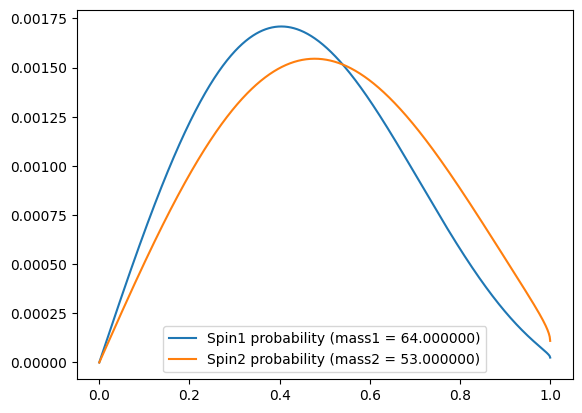

(64, 53, 0.495, 0.842)

In [ ]:
mass_spin_components(plot_probability=True)

In [ ]:
num_binary_components = 1000
mass1_array = []
mass2_array = []
spin1_array = []
spin2_array = []
for i in range(num_binary_components):
  m1, m2, s1, s2 = mass_spin_components()
  mass1_array.append(m1)
  mass2_array.append(m2)
  spin1_array.append(s1)
  spin2_array.append(s2)

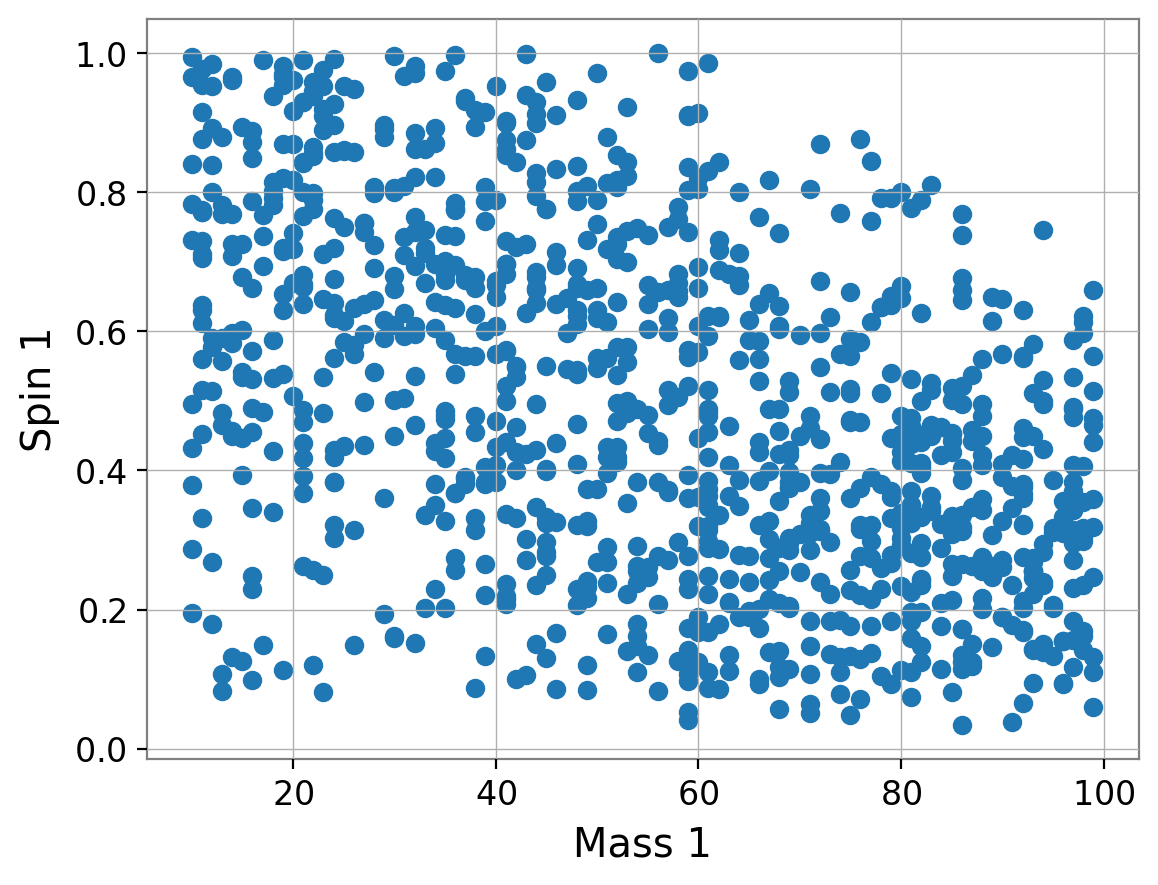

In [ ]:
plt.scatter(mass1_array, spin1_array)
plt.xlabel("Mass 1")
plt.ylabel("Spin 1")
plt.show()

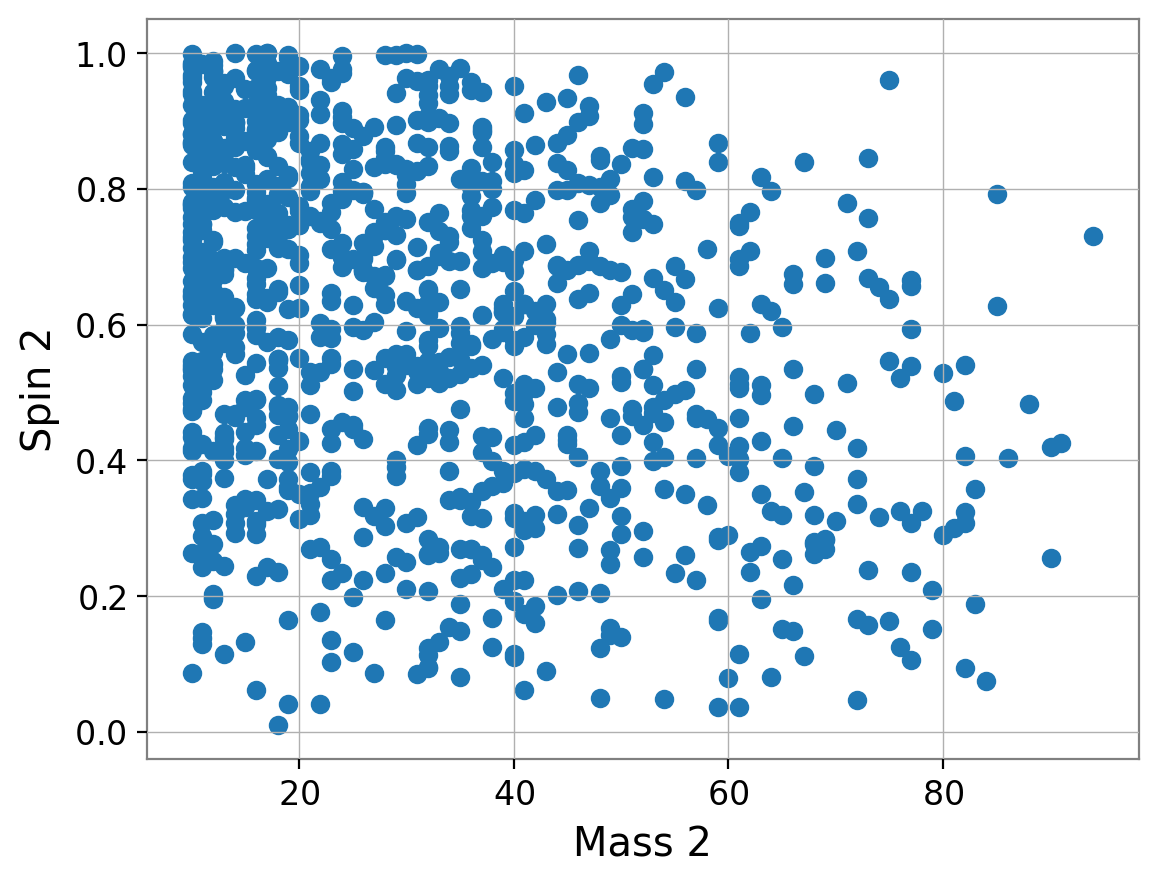

In [ ]:
plt.scatter(mass2_array, spin2_array)
plt.xlabel("Mass 2")
plt.ylabel("Spin 2")
plt.show()

In [ ]:
print(mass1_array)
print(mass2_array)
print(spin1_array)
print(spin2_array)

[68, 21, 60, 50, 49, 41, 48, 40, 18, 32, 71, 40, 61, 22, 11, 79, 66, 98, 88, 21, 72, 81, 75, 48, 47, 24, 80, 36, 86, 99, 19, 32, 85, 82, 52, 31, 61, 83, 52, 56, 42, 75, 94, 78, 83, 60, 46, 20, 46, 86, 59, 34, 15, 68, 17, 94, 84, 83, 77, 61, 57, 96, 29, 53, 91, 66, 98, 93, 34, 12, 48, 23, 74, 59, 69, 49, 47, 67, 59, 48, 44, 93, 71, 82, 61, 13, 59, 78, 19, 96, 62, 90, 92, 84, 98, 67, 27, 82, 22, 92, 71, 73, 16, 66, 92, 41, 86, 38, 19, 21, 34, 33, 61, 51, 18, 58, 27, 94, 21, 52, 82, 21, 94, 56, 95, 11, 30, 98, 93, 48, 48, 15, 81, 49, 79, 84, 73, 92, 40, 77, 43, 30, 66, 81, 58, 50, 18, 72, 69, 31, 71, 38, 11, 39, 82, 98, 41, 45, 15, 61, 85, 97, 81, 96, 38, 70, 24, 53, 64, 35, 75, 43, 76, 48, 93, 71, 38, 86, 48, 11, 44, 86, 40, 50, 97, 20, 92, 71, 31, 21, 21, 86, 82, 92, 54, 67, 33, 88, 81, 53, 19, 15, 80, 45, 53, 49, 79, 91, 28, 69, 61, 22, 18, 88, 36, 37, 81, 35, 16, 40, 52, 28, 13, 11, 64, 25, 59, 14, 77, 22, 67, 38, 16, 42, 38, 42, 58, 70, 92, 81, 50, 65, 86, 61, 68, 90, 33, 92, 50, 92,

In [ ]:

def second_gen_total_mass(mass1, mass2, spin1, spin2):
    sg_total_mass_array = []
    for x in range (len(mass1)):
     mu_numerator = mass1[x] * mass2[x]
     mu_denominator = (mass1[x]+mass2[x])**2
     chi_numerator = (((spin1[x]) * ((mass1[x])**2)) + (((spin2[x]) * ((mass2[x]**2)))))
     chi_denominator = (mass1[x]+mass2[x])**2
     mu = mu_numerator / mu_denominator
     chi = chi_numerator / chi_denominator
     tmass = 0.988 + (-0.610* (mu**2)) + (-0.042*chi)
     sg_total_mass_array.append(tmass)
    return sg_total_mass_array

In [ ]:
second_gen_total_mass(mass1_array,mass2_array, spin1_array,spin2_array)

[0.9420159332826814,
 0.9394554078674824,
 0.9347372533230525,
 0.9486920587088804,
 0.9490084712103918,
 0.9380321500458143,
 0.94365424,
 0.9300442553801818,
 0.9388465794918783,
 0.938356411169029,
 0.9572052185812252,
 0.9549656999404783,
 0.9399575439341319,
 0.9357561851707661,
 0.9303796112216618,
 0.9442161739602767,
 0.9438907707283198,
 0.9582654570776328,
 0.9485301702957101,
 0.9343300547839506,
 0.9451185693545523,
 0.9684320956218837,
 0.96243975093689,
 0.9417579766220521,
 0.9409783043950617,
 0.9498818134361419,
 0.9470650493844037,
 0.9382763960112014,
 0.968842457513628,
 0.9452863027097524,
 0.9295834161427374,
 0.9446937879926235,
 0.9550243415032359,
 0.9472645432098766,
 0.9498495200682588,
 0.9351086034876543,
 0.9481695063531816,
 0.9631637732147944,
 0.9421622115085059,
 0.93839114331027,
 0.9571208748036336,
 0.9397928781436873,
 0.9671274483489644,
 0.9505694849678524,
 0.9423785890680967,
 0.9513712419352697,
 0.9466519240818563,
 0.9365155293627655,
 0.962

In [ ]:
def final_spin(spin_1, spin_2, mass1, mass2,finalmpara):
    sg_final_spin_array =[]
    for x in range (len(mass1)):
        mu_numerator = mass1[x] * mass2[x]
        mu_denominator = (mass1[x]+mass2[x])**2
        chi_numerator = (((spin_1[x]) * ((mass1[x])**2)) + (((spin_2[x]) * ((mass2[x]**2)))))
        chi_denominator = (mass1[x]+mass2[x])**2
        mu = mu_numerator / mu_denominator
        chi = chi_numerator / chi_denominator
        fmp = finalmpara[x]

        result = (3.270 * mu) + (0.846*chi) - (2.583 * (1-fmp))
        sg_final_spin_array.append(result)
    return(sg_final_spin_array)

finalmpara = second_gen_total_mass(mass1_array,mass2_array, spin1_array,spin2_array)

In [ ]:
def bianchi(mass1, mass2):
    f=[]
    for x in range(len(mass1)):
        numerator = mass1[x] - mass2[x]
        denominator = mass1[x] + mass2[x]
        result = numerator / denominator
        result2 = 0.686 - (0.565*(result**2))
        f.append(result2)
    return f

In [ ]:
bianchi(mass1_array,mass2_array)

[0.6513324635973403,
 0.6547197231833911,
 0.685960101687734,
 0.629656509695291,
 0.5403704142011835,
 0.669395918367347,
 0.6634000000000001,
 0.6851423511553382,
 0.6855387755102041,
 0.5852765432098767,
 0.5085377369882865,
 0.5221834319526628,
 0.6403617728531856,
 0.6856944294213089,
 0.684718820861678,
 0.6660370286618803,
 0.6371245674740484,
 0.42840886843450954,
 0.6486408163265307,
 0.6703055555555556,
 0.6320214876033059,
 0.4571983471074381,
 0.35560207612456757,
 0.6666241426611798,
 0.6497395555555556,
 0.590204152249135,
 0.658311345492687,
 0.6813305785123968,
 0.48759122085048023,
 0.6215140613586561,
 0.6842561728395062,
 0.5692644628099175,
 0.5496626654355187,
 0.6232222222222223,
 0.44670420760896956,
 0.6853722222222223,
 0.6358687188773201,
 0.46356247597078054,
 0.6809290858725763,
 0.6847662677963141,
 0.5289206611570249,
 0.6850190972222223,
 0.47793768719409757,
 0.527643598615917,
 0.6665132653061225,
 0.6174524681227118,
 0.5537159209157129,
 0.67446938775

In [ ]:

final_spin(spin1_array,spin2_array, mass1_array, mass2_array, finalmpara)



[0.8672194891427794,
 0.9084124586601152,
 0.9538945206586334,
 0.7728027122987777,
 0.837390913799164,
 0.9164346023438484,
 0.82476978192,
 1.0373408915087063,
 0.8822705450316033,
 0.9939550219014536,
 0.7091902799334281,
 0.742368639632646,
 0.9151942464527767,
 0.9363398022831086,
 1.031988426942015,
 0.8118193521825176,
 0.8495073902030148,
 0.7085937667996166,
 0.755786438853411,
 0.980356948173611,
 0.8331732831552052,
 0.5271498881152926,
 0.6248817175004368,
 0.8542939976476822,
 0.887193678119111,
 0.7876347587076304,
 0.7707310268720179,
 0.8975816333762721,
 0.5125351438893883,
 0.8405935561483775,
 1.046554385192987,
 0.8946543849634587,
 0.7262411543429321,
 0.8042069817777779,
 0.8549832030044909,
 0.9481202044752779,
 0.7756710915874977,
 0.6184773762714841,
 0.8298483552073571,
 0.891247026637979,
 0.7011586576343146,
 0.8663126396618109,
 0.5454853264138868,
 0.816854827422828,
 0.843526745460853,
 0.7376073306192182,
 0.8707251873331954,
 0.9369587552011662,
 0.6101

In [ ]:
final_spin_sg = final_spin(spin1_array,spin2_array, mass1_array, mass2_array, finalmpara)
bianchi_af = bianchi(mass1_array, mass2_array)




In [ ]:
from statistics import mean
z=mean(final_spin_sg)
y=mean(spin1_array)
e=mean(spin2_array)
f=mean(bianchi_af)
print(str(y) + ':' + str(e) + ':' +  str(z) + ':' + str(f))

0.48801900000000004:0.596166:0.8242584344103272:0.6252062080142845


In [ ]:


def chi_eff(mass1, mass2, spin1, spin2, length):
    chi_eff_array=[]
    for x in range(len(length)):
        z = random.randrange(-100,100)/100
        numerator = (mass1[x]*spin1[x]) + (mass2[x]*spin2[x])
        denominator = mass1[x] + mass2[x]
        cheff = (numerator * z)/denominator
        chi_eff_array.append(cheff)
    return chi_eff_array



In [ ]:
chi_eff_1g =chi_eff(mass1_array, mass2_array, spin1_array, spin2_array, final_spin_sg)

In [ ]:
def chi_eff2(mass1, mass2, spin1, spin2, length):
    chi_eff_array=[]
    for x in range(len(length)):
        z = random.randrange(-100,100)/100
        numerator = (mass1[x]*spin1[x]) + (mass2[x]*spin2[x])
        denominator = mass1[x] + mass2[x]
        cheff = (numerator * z)/denominator
        chi_eff_array.append(cheff)
    return chi_eff_array

bianchi_chi = chi_eff2(mass1_array, mass2_array, spin1_array, spin2_array, bianchi_af)

In [ ]:
#data = pd.read_csv("GWData.csv")
#eventname = data['commonName'].tolist()
# converting column data to list
#mass_1 = data['mass_1_source'].tolist()
#mass_2 =data['mass_2_source'].tolist()
#final_mass =data['final_mass_source'].tolist()
#effsp = data['chi_eff'].tolist()
#mass_1_unc_up =data['mass_1_source_upper'].tolist()
#mass_1_unc_dw =data['mass_1_source_lower'].tolist()
#mass_2_unc_up =data['mass_2_source_upper'].tolist()
#mass_2_unc_dw =data['mass_2_source_lower'].tolist()
#final_mass_unc_up =data['final_mass_source_upper'].tolist()
#final_mass_unc_dw =data['final_mass_source_lower'].tolist()
#effsp_unc_up =data['chi_eff_upper'].tolist()
#effsp_unc_dw =data['chi_eff_lower'].tolist()
#print(eventname)
#print(len(eventname))
#When Mass >= 3 Solar Mass ,black hole

toremove =[]
for x in data_library['mass_2']:
    if float(x)<5:
        index = data_library['mass_2'].index(x)
        toremove.append(index)
    elif str(x) == 'nan':
        index = data_library['mass_2'].index(x)
        toremove.append(index)

for x in data_library:
    print(len(data_library[x]))

print(toremove)


83
83
83
83
83
83
83
83
83
83
83
83
83
[15, 16, 38, 41, 45, 59, 63, 70]


In [ ]:
for y in toremove:
    for x in data_library:
        parameter = data_library[x]
        del parameter[y]

for x in data_library:
    parameter = data_library[x]
    print(len(parameter))

75
75
75
75
75
75
75
75
75
75
75
75
75


In [ ]:
for y in toremove:
    del a_1_final[y]

for y in toremove:
    del a_2_final[y]

print(len(a_1_final))
print(len(a_2_final))

75
75


In [ ]:
GW_dmass = second_gen_total_mass(data_library['mass_1'],data_library['mass_2'], a_1_final,a_2_final)

GW_af_value = final_spin(a_1_final, a_2_final, data_library['mass_1'],data_library['mass_2'], GW_dmass )

GW_chi_eff= chi_eff(data_library['mass_1'],data_library['mass_2'], a_1_final,a_2_final, a_1_final)

GW_bianchi_af = bianchi(data_library['mass_1'],data_library['mass_2'])

GW_bianchi_chi_eff = chi_eff2(data_library['mass_1'],data_library['mass_2'], a_1_final,a_2_final, a_1_final)

Text(0, 0.5, 'Final Spin Parameter')

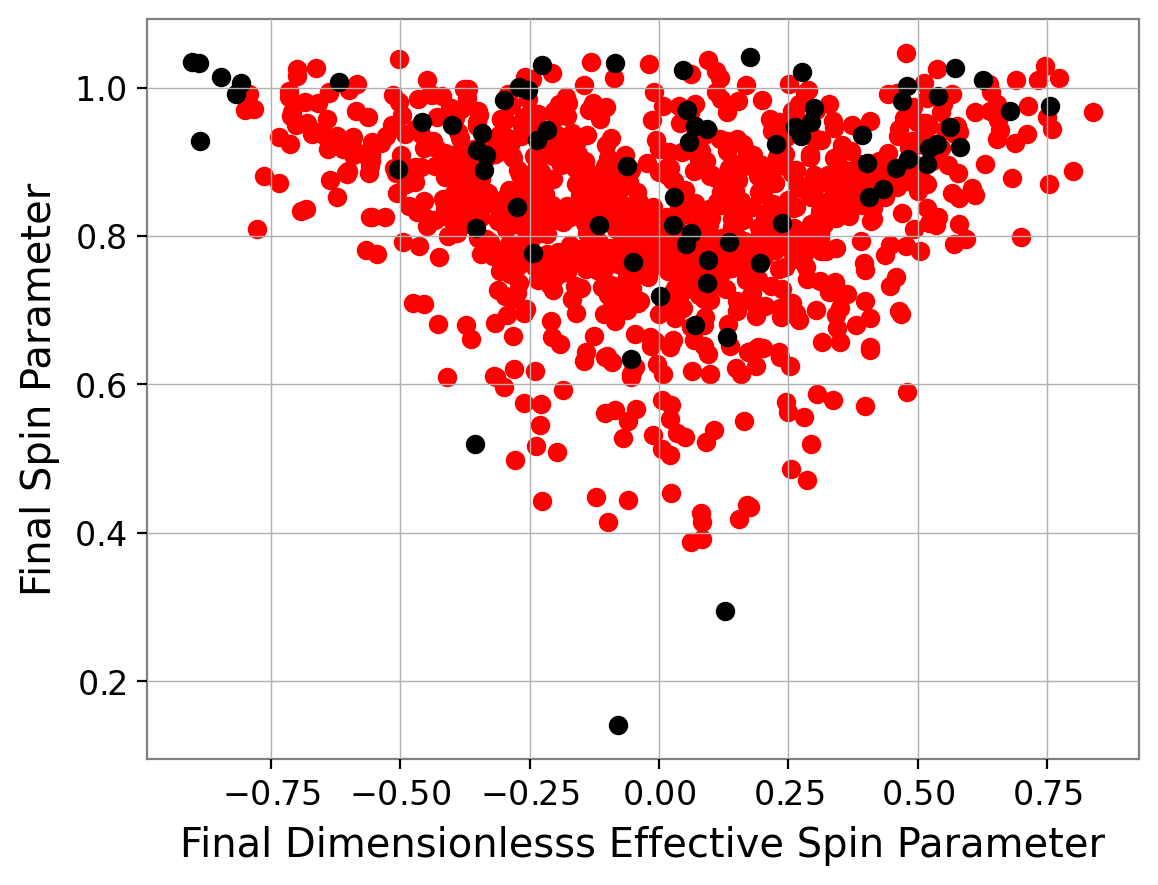

In [ ]:

###Paper approach
plt.scatter(chi_eff_1g, final_spin_sg, color = 'red')
plt.scatter(GW_chi_eff, GW_af_value, color = 'black')
plt.xlabel('Final Dimensionlesss Effective Spin Parameter')
plt.ylabel('Final Spin Parameter')


Text(0, 0.5, 'Final Spin Parameter')

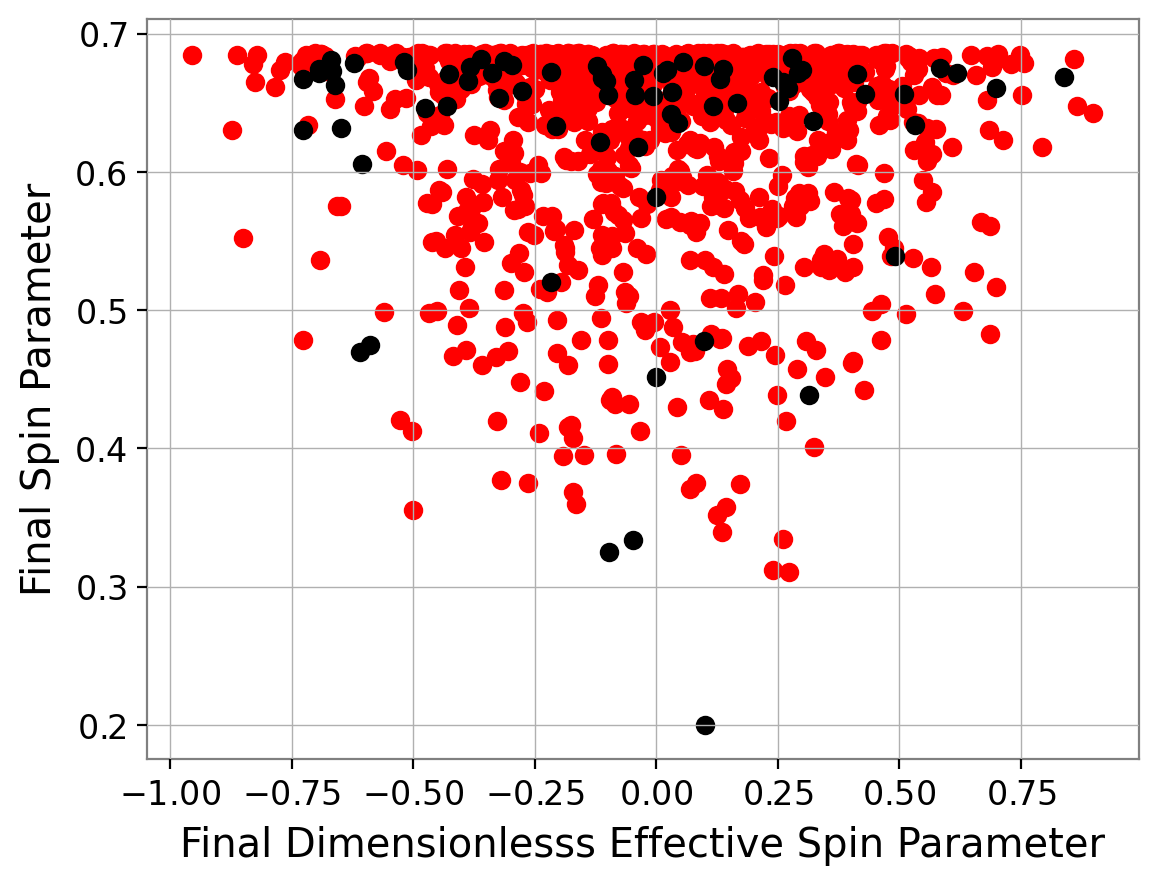

In [ ]:
###Bianchi Approach




plt.scatter(bianchi_chi, bianchi_af, color = 'red')
plt.scatter(GW_bianchi_chi_eff,GW_bianchi_af, color = 'black')
plt.xlabel('Final Dimensionlesss Effective Spin Parameter')
plt.ylabel('Final Spin Parameter')


In [ ]:

pmarray = []
for x in range(len(mass1_array)):
    p = mass1_array[x] + mass2_array[x]
    pmarray.append(p)


pmspinarray2=[]
for x in range(len(mass1_array)):
    s = choose_spin()
    pmspinarray2.append(s)


In [ ]:
#final_spin_sg
#bianchi_af

def second_choose_mass(pmarray, min_mass=10 ):
    pmarray2=[]
    for x in pmarray:
      if min_mass != int(x):
        mass = random.randrange(min_mass, int(x))
        pmarray2.append(mass)
      else:
        mass = min_mass
        pmarray2.append(mass)
    return pmarray2

In [ ]:
pmarray_f = second_choose_mass(pmarray)


In [ ]:
print(len(pmarray_f))

1000


In [ ]:
####Paper approach
finalmpara2 = second_gen_total_mass(pmarray,pmarray_f, final_spin_sg,pmspinarray2)

In [ ]:
final_spin_2g = final_spin(final_spin_sg,pmspinarray2, pmarray, pmarray_f, finalmpara2)


In [ ]:
print(len(final_spin_2g))
print(len(pmarray))
print(len(pmarray_f))
print(len(pmspinarray2))

1000
1000
1000
1000


In [ ]:
chi_eff_secondgen = chi_eff(pmarray, pmarray_f, final_spin_sg, pmspinarray2, final_spin_2g)

In [ ]:
## Binachi values
secondgen_bianchi_af = bianchi(pmarray,pmarray_f)

In [ ]:
secondgen_bianchi_chi_eff = chi_eff2(pmarray, pmarray_f, bianchi_af, pmspinarray2, secondgen_bianchi_af)

Text(0, 0.5, 'Final Spin Parameter')

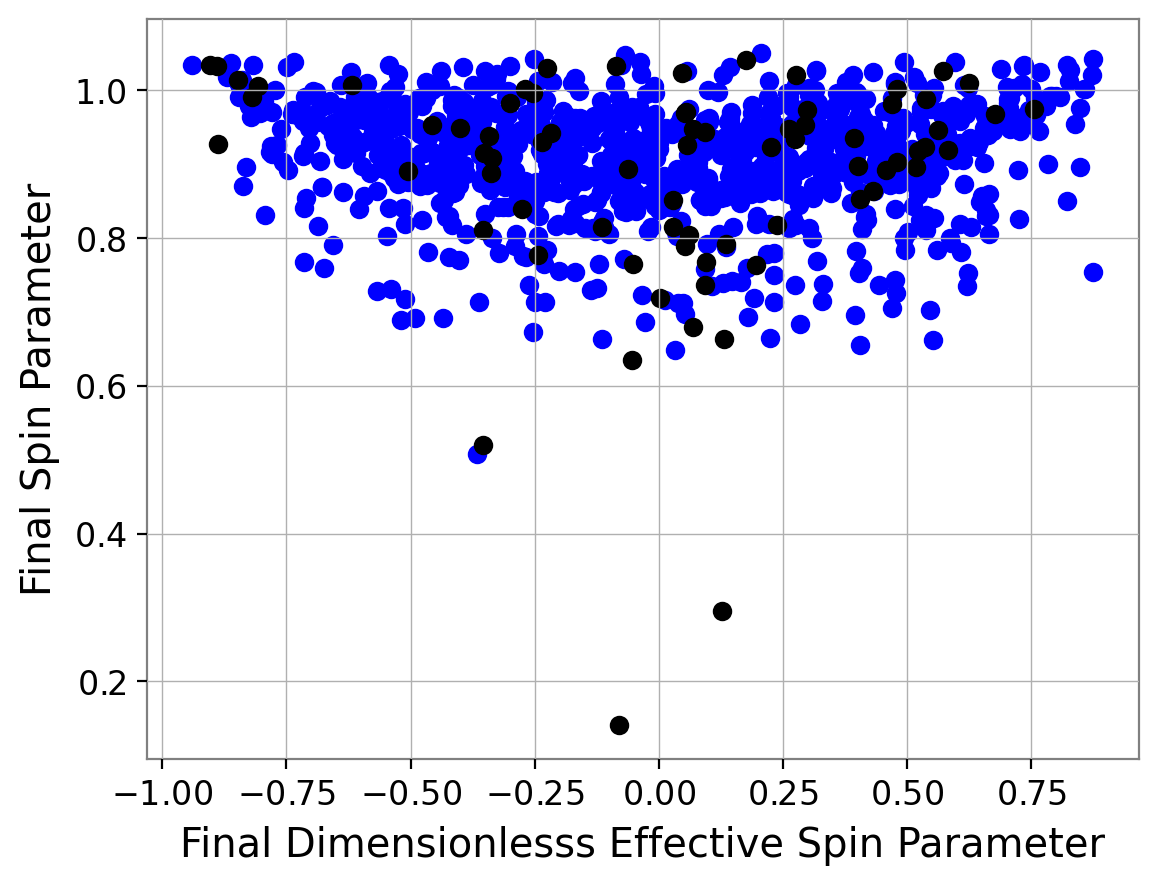

In [ ]:
#Paper graph
plt.scatter(chi_eff_secondgen, final_spin_2g, color = 'blue')
plt.scatter(GW_chi_eff, GW_af_value, color = 'black')
plt.xlabel('Final Dimensionlesss Effective Spin Parameter')
plt.ylabel('Final Spin Parameter')

Text(0, 0.5, 'Final Spin Parameter')

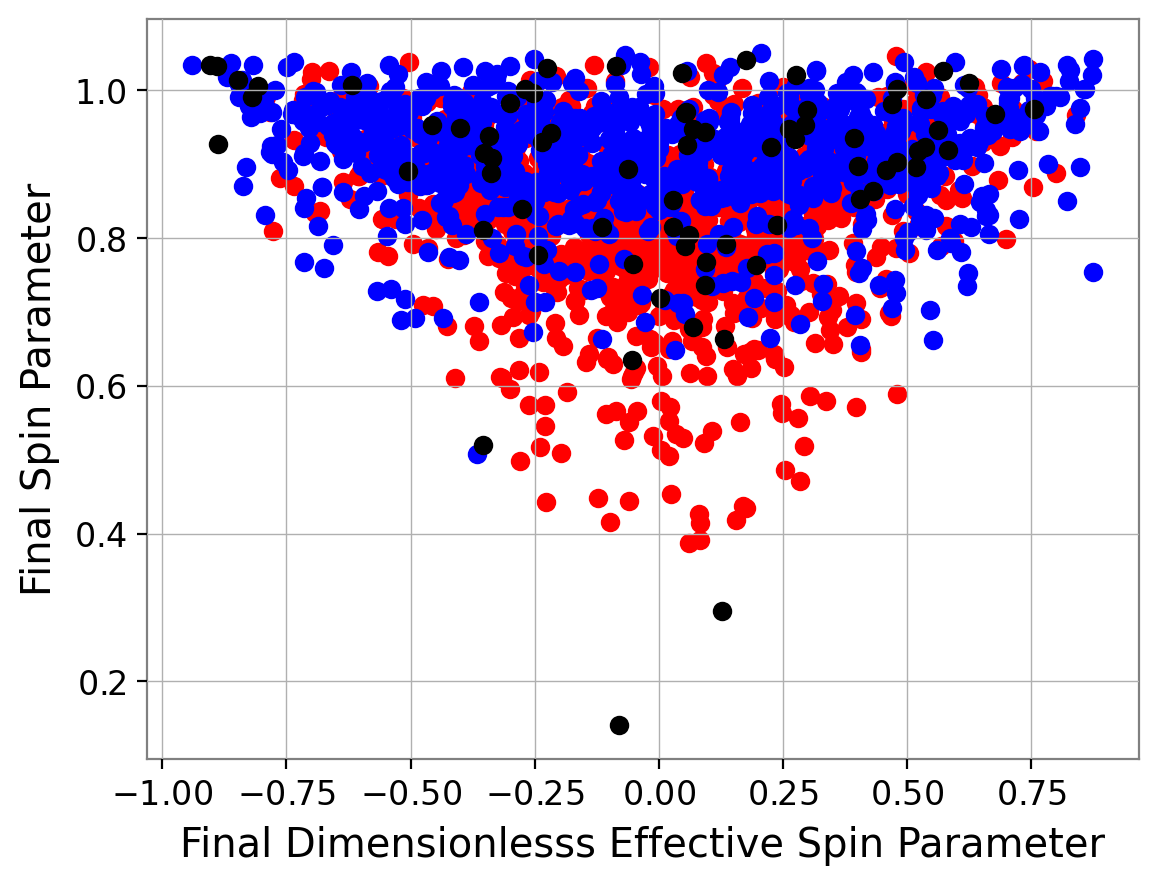

In [ ]:
plt.scatter(chi_eff_1g, final_spin_sg, color = 'red')   #1g-1g
plt.scatter(chi_eff_secondgen, final_spin_2g, color = 'blue') #1g-2g
plt.scatter(GW_chi_eff, GW_af_value, color = 'black') #GW Events
plt.xlabel('Final Dimensionlesss Effective Spin Parameter')
plt.ylabel('Final Spin Parameter')

Text(0, 0.5, 'Final Spin Parameter')

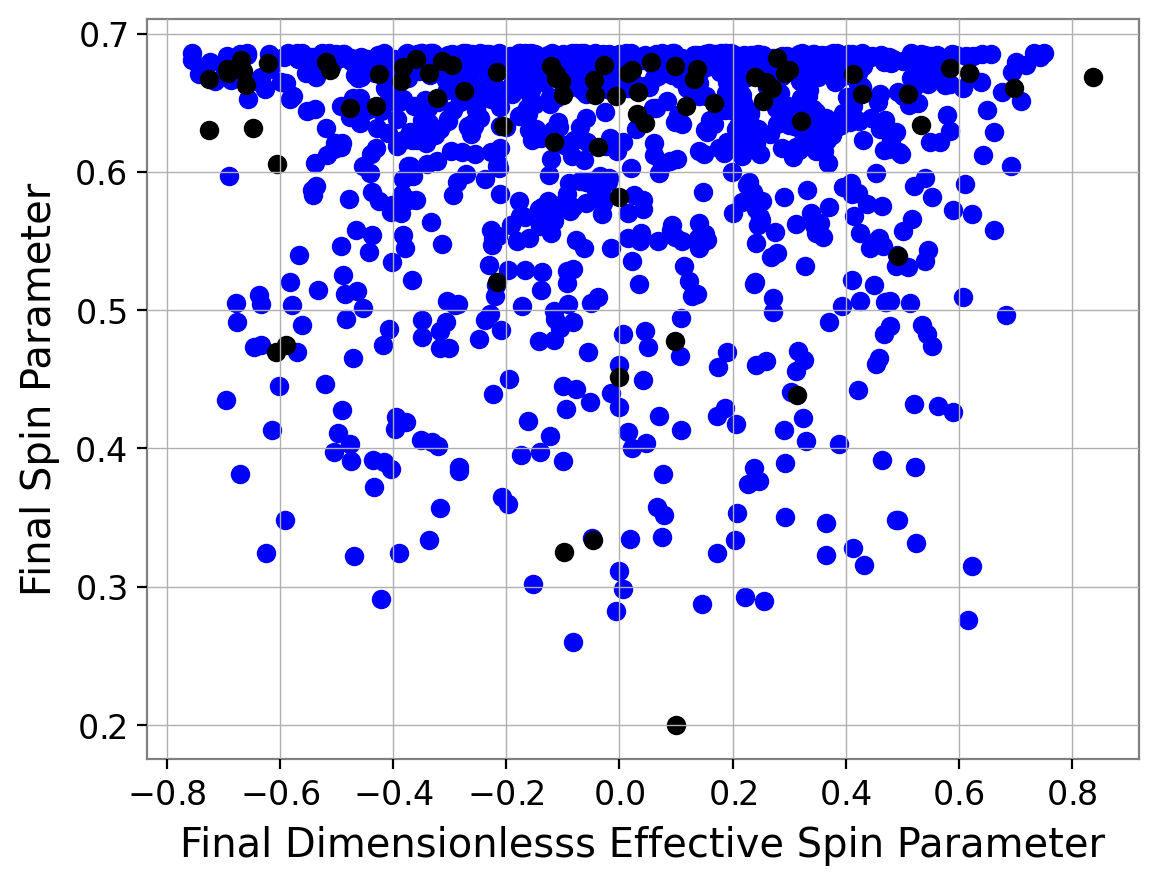

In [ ]:
#Bianchi graph

plt.scatter(secondgen_bianchi_chi_eff, secondgen_bianchi_af, color = 'blue')
plt.scatter(GW_bianchi_chi_eff, GW_bianchi_af, color = 'black')
plt.xlabel('Final Dimensionlesss Effective Spin Parameter')
plt.ylabel('Final Spin Parameter')

Text(0, 0.5, 'Final Spin Parameter')

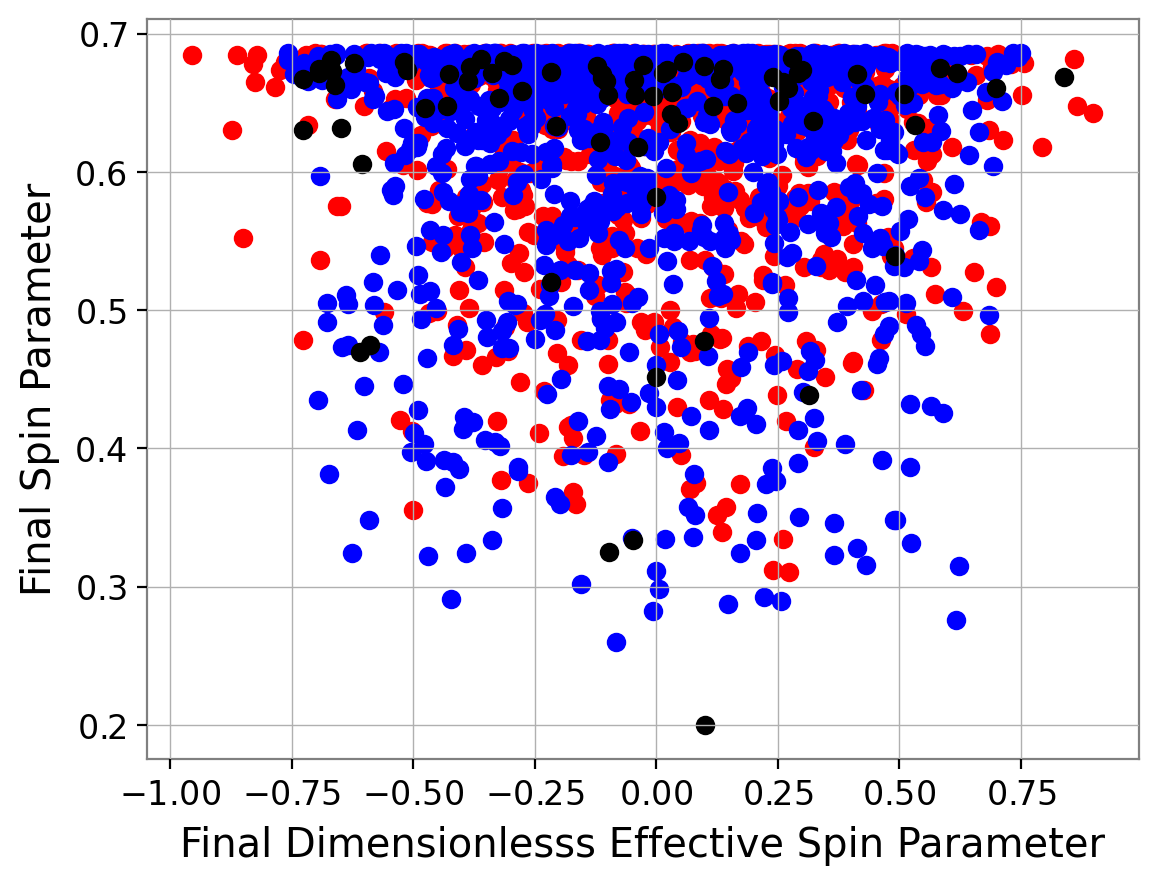

In [ ]:
plt.scatter(bianchi_chi, bianchi_af, color = 'red')
plt.scatter(secondgen_bianchi_chi_eff, secondgen_bianchi_af, color = 'blue')
plt.scatter(GW_bianchi_chi_eff, GW_bianchi_af, color = 'black')
plt.xlabel('Final Dimensionlesss Effective Spin Parameter')
plt.ylabel('Final Spin Parameter')

In [ ]:
#End of the code, yay!

secondgen_